<a href="https://colab.research.google.com/github/fabio-baum/ia_para_engenheiros2/blob/main/Aula_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from google.colab import files

In [62]:
# Upload the CSV file
print("Please upload your CSV file:")
uploaded = files.upload()

Please upload your CSV file:


Saving Database_CdSe.csv to Database_CdSe (1).csv


In [63]:
# Load the data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [64]:
# Display basic info about the dataset
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())


Dataset shape: (357, 29)

First few rows:
   Temperature  Growth      Metal_source  Metal_amount  Metal_mmol  \
0          300     300  cadmium stearate        0.1300         0.2   
1          225     225     cadmium oxide        0.0100         0.1   
2          250     250  cadmium stearate        0.0678         0.1   
3          250     250  cadmium stearate        0.0678         0.1   
4          250     250  cadmium stearate        0.0678         0.1   

   Metal_concentration Chalcogen_source  Chalcogen_amount  Chalcogen_mmol  \
0             0.020000        Se powder           0.06000            0.80   
1             0.010000        Se powder           0.03000            0.38   
2             0.035258        Se powder           0.00395            0.05   
3             0.035258        Se powder           0.00395            0.05   
4             0.035258        Se powder           0.00395            0.05   

   Chalcogen_concentration  ...  Phosphines_mmol Chalcogen/Ph_ratio  \
0 

In [65]:
# Remover a coluna de citações
df = df.drop('Citation', axis=1)

In [66]:
# Listar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categoric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categoric columns:", categoric_cols)

Numeric columns: ['Temperature', 'Growth', 'Metal_amount', 'Metal_mmol', 'Metal_concentration', 'Chalcogen_amount', 'Chalcogen_mmol', 'Chalcogen_concentration', 'Metal/Se_ratio', 'CA_amount', 'CA_mmol', 'Cd/CA_ratio', 'Amines_amount', 'Phosphines_amount', 'Phosphines_mmol', 'Chalcogen/Ph_ratio', 'S_I_amount', 'S_II_amount', 'Total_amount', 'Time_min', 'Diameter_nm']
Categoric columns: ['Metal_source', 'Chalcogen_source', 'Carboxylic_Acid', 'Amines', 'Phosphines', 'Solvent I', 'Solvent II']


In [67]:
# Aplicar variável dummy para as variáveis categóricas

# Usando "one-hot encoding"

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Reshape the column to a 2D array as required by the encoder
encoded_features = encoder.fit_transform(df[categoric_cols])

# Get the feature names for the new columns
feature_names = encoder.get_feature_names_out(categoric_cols)

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original DataFrame (excluding the original 'Fruit' column)
# with the new encoded DataFrame
df_ohe = pd.concat([df.drop(categoric_cols, axis=1), encoded_df], axis=1)

In [68]:
# Usando "label encoder"

encoder = LabelEncoder()
for col in categoric_cols:
    df[col] = encoder.fit_transform(df[col])

In [69]:
# Split the data between x and y, train and validation

X_le = df.drop('Diameter_nm', axis=1)
y_le = df['Diameter_nm']

X_ohe = df_ohe.drop('Diameter_nm', axis=1)
y_ohe = df_ohe['Diameter_nm']

In [70]:
# Handle missing values if any
X_le = X_le.fillna(X_le.mean())
y_le = y_le.fillna(y_le.mean())

X_ohe = X_ohe.fillna(X_ohe.mean())
y_ohe = y_ohe.fillna(y_ohe.mean())

In [71]:
# Split the data
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

In [72]:
# Create and train decision tree regressor
# Label encoded
dt_regressor_le = DecisionTreeRegressor(
    max_depth=5,  # Limit depth for better visualization
    random_state=42
)
dt_regressor_le.fit(X_le_train, y_le_train)

# One-hot encoded
dt_regressor_ohe = DecisionTreeRegressor(
    max_depth=5,  # Limit depth for better visualization
    random_state=42
)
dt_regressor_ohe.fit(X_ohe_train, y_ohe_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [73]:
# Make predictions
# Label encoded
y_pred = dt_regressor_le.predict(X_le_test)

# One-hot encoded
y_pred_ohe = dt_regressor_ohe.predict(X_ohe_test)

In [74]:
# Evaluate the model le vs ohe
# Label encoded
mse_le = mean_squared_error(y_le_test, y_pred)
r2_le = r2_score(y_le_test, y_pred)

# One-hot encoded
mse_ohe = mean_squared_error(y_ohe_test, y_pred_ohe)
r2_ohe = r2_score(y_ohe_test, y_pred_ohe)

# Print the results
print("Label Encoded Results:")
print("MSE:", mse_le)
print("R2 Score:", r2_le)
print("\nOne-Hot Encoded Results:")
print("MSE:", mse_ohe)
print("R2 Score:", r2_ohe)

Label Encoded Results:
MSE: 0.7039954725587271
R2 Score: 0.7984112936487258

One-Hot Encoded Results:
MSE: 0.7039954725587269
R2 Score: 0.7984112936487259


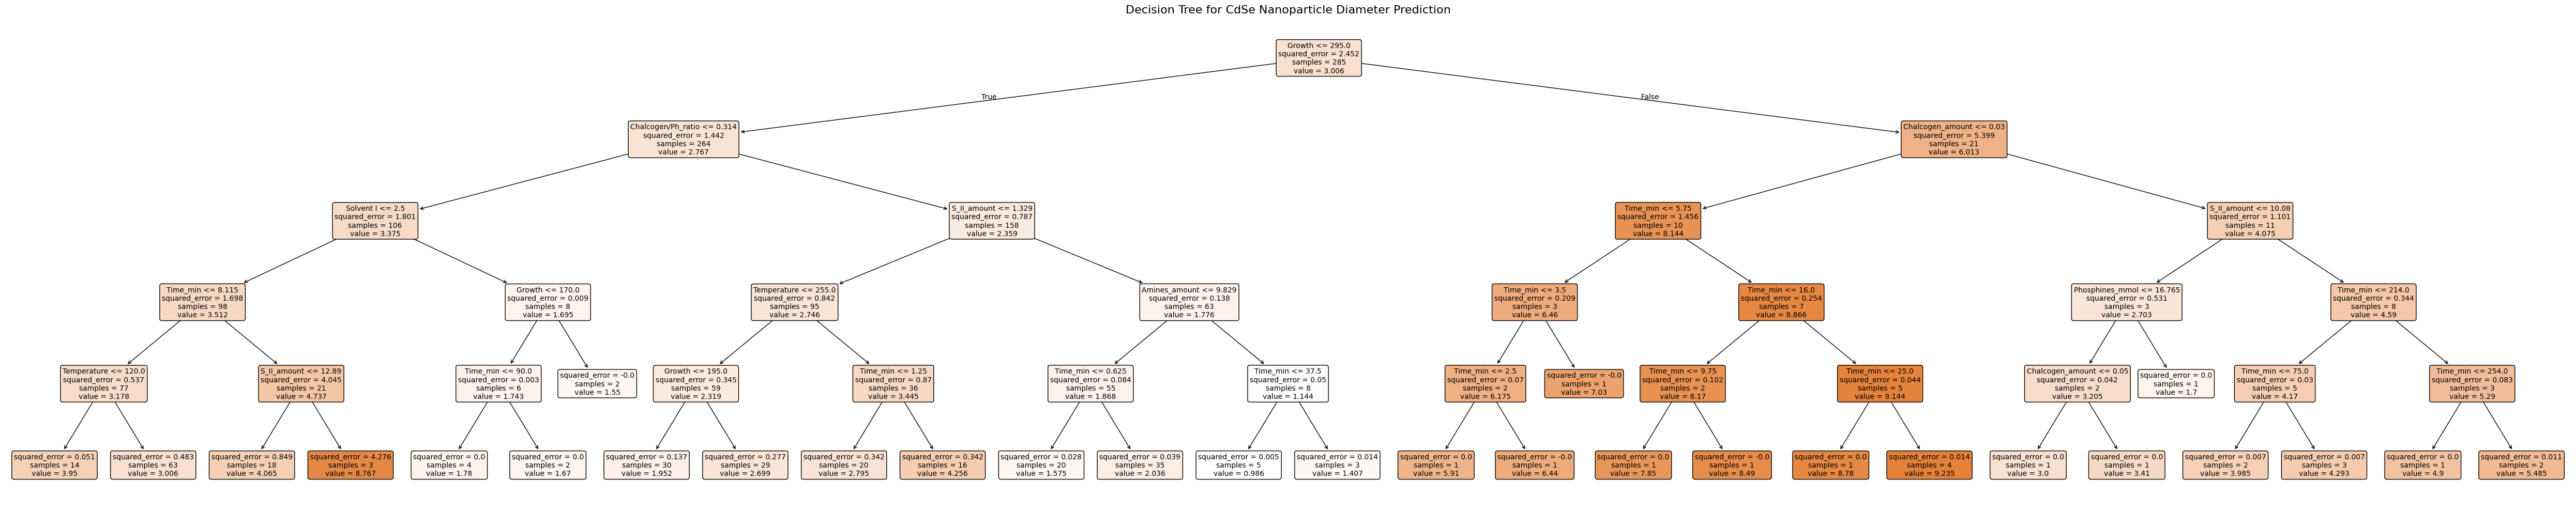

In [75]:
# Plot the decision tree
plt.figure(figsize=(50, 10))
plot_tree(
    dt_regressor_le,
    feature_names=df.columns.to_list(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for CdSe Nanoparticle Diameter Prediction", fontsize=16)
plt.tight_layout()
plt.show()

In [76]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_le.columns.to_list(),
    'importance': dt_regressor_le.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    feature  importance
1                    Growth    0.347773
24              S_II_amount    0.163414
7          Chalcogen_amount    0.141552
26                 Time_min    0.129400
20       Chalcogen/Ph_ratio    0.106761
0               Temperature    0.062836
21                Solvent I    0.039824
16            Amines_amount    0.005977
19          Phosphines_mmol    0.002463
2              Metal_source    0.000000
3              Metal_amount    0.000000
10           Metal/Se_ratio    0.000000
9   Chalcogen_concentration    0.000000
8            Chalcogen_mmol    0.000000
6          Chalcogen_source    0.000000
4                Metal_mmol    0.000000
5       Metal_concentration    0.000000
13                  CA_mmol    0.000000
11          Carboxylic_Acid    0.000000
18        Phosphines_amount    0.000000
17               Phosphines    0.000000
15                   Amines    0.000000
14              Cd/CA_ratio    0.000000
12                C

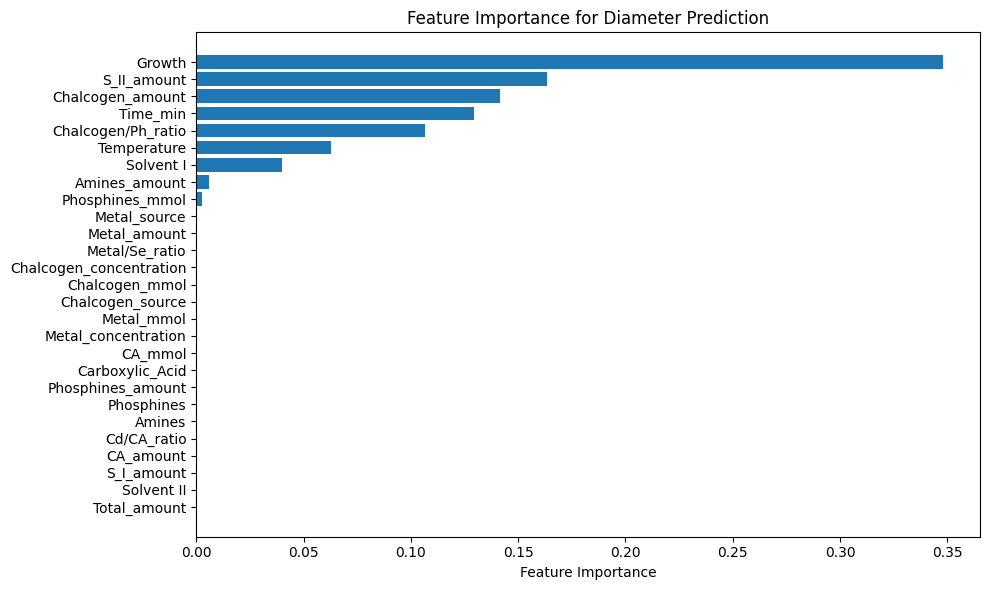

In [77]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Diameter Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

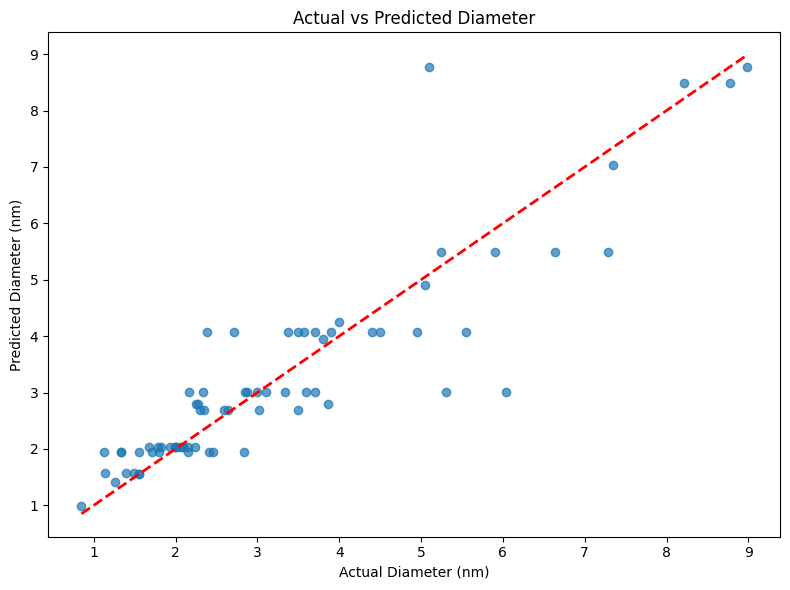

In [78]:
# Optional: Display actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_le_test, y_pred, alpha=0.7)
plt.plot([y_le_test.min(), y_le_test.max()], [y_le_test.min(), y_le_test.max()], 'r--', lw=2)
plt.xlabel('Actual Diameter (nm)')
plt.ylabel('Predicted Diameter (nm)')
plt.title('Actual vs Predicted Diameter')
plt.tight_layout()
plt.show()

In [79]:
# Create and train Random Forest regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    max_depth=10,          # Maximum depth of trees
    random_state=42,
    n_jobs=-1             # Use all available cores
)

rf_regressor.fit(X_le_train, y_le_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [80]:
# Make predictions
y_pred = rf_regressor.predict(X_le_test)

In [81]:
# Evaluate the model
mse = mean_squared_error(y_le_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_le_test, y_pred)

print(f"\n=== Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f} nm")



=== Model Performance ===
R² Score: 0.9262
Root Mean Squared Error: 0.5075 nm


In [82]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_le_train.columns.to_list(),
    'importance': rf_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Top 10 Most Important Features ===")
print(feature_importance)


=== Top 10 Most Important Features ===
                    feature  importance
1                    Growth    0.349554
26                 Time_min    0.183323
8            Chalcogen_mmol    0.079576
20       Chalcogen/Ph_ratio    0.056645
5       Metal_concentration    0.039187
25             Total_amount    0.035433
7          Chalcogen_amount    0.033963
18        Phosphines_amount    0.027836
19          Phosphines_mmol    0.024151
9   Chalcogen_concentration    0.018207
24              S_II_amount    0.017828
3              Metal_amount    0.016795
10           Metal/Se_ratio    0.015763
12                CA_amount    0.015682
0               Temperature    0.014372
4                Metal_mmol    0.013850
13                  CA_mmol    0.011924
14              Cd/CA_ratio    0.011108
2              Metal_source    0.010119
16            Amines_amount    0.006824
11          Carboxylic_Acid    0.004611
22               S_I_amount    0.004079
23               Solvent II    0.003797


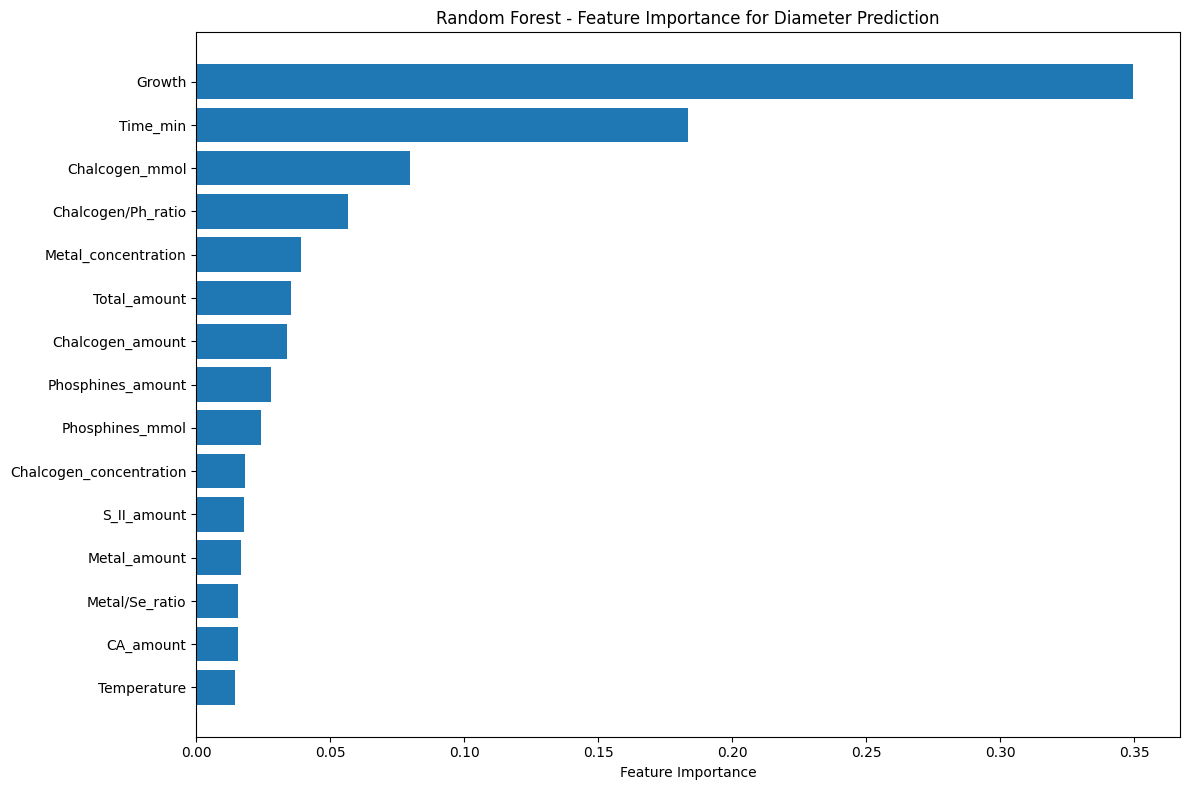

In [83]:
# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)  # Show top 15 features
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance for Diameter Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

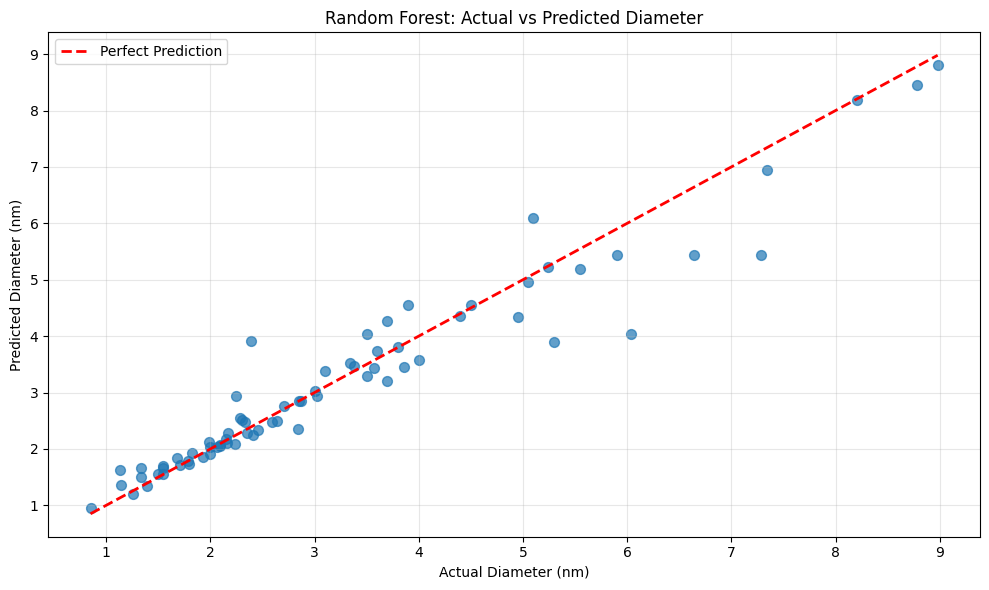

In [84]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_le_test, y_pred, alpha=0.7, s=50)
plt.plot([y_le_test.min(), y_le_test.max()], [y_le_test.min(), y_le_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Diameter (nm)')
plt.ylabel('Predicted Diameter (nm)')
plt.title('Random Forest: Actual vs Predicted Diameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

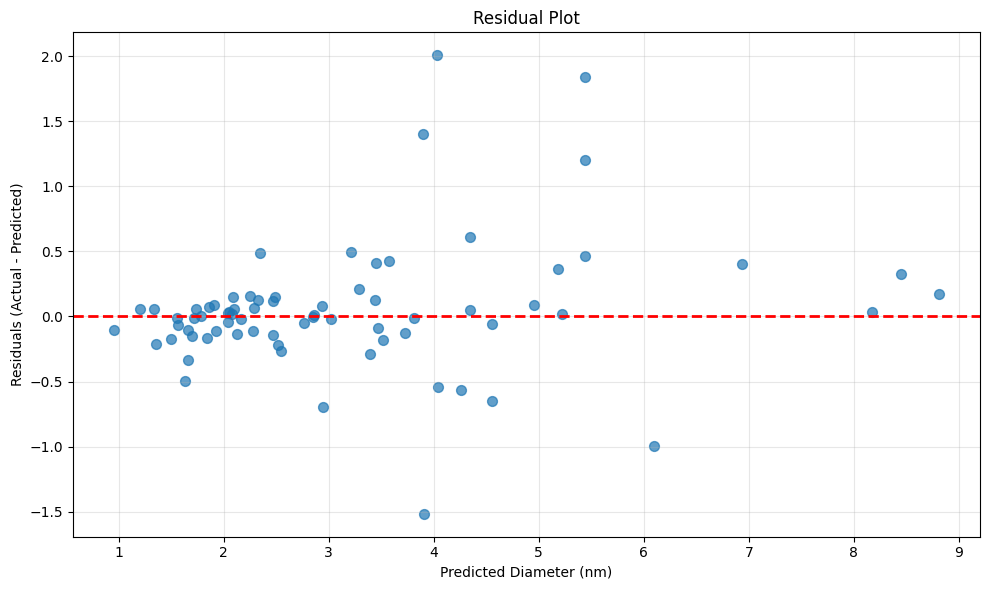

In [85]:
# Residual plot
residuals = y_le_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, s=50)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Diameter (nm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [86]:
# Create and train Extra Trees regressor
et_regressor = ExtraTreesRegressor(
    n_estimators=100,      # Number of trees in the forest
    max_depth=15,          # Maximum depth of trees
    random_state=42,
    n_jobs=-1,            # Use all available cores
    bootstrap=True         # Use bootstrap samples
)

et_regressor.fit(X_le_train, y_le_train)

ExtraTreesRegressor(bootstrap=True, max_depth=15, n_jobs=-1, random_state=42)

In [87]:
# Make predictions
y_pred = et_regressor.predict(X_le_test)

In [88]:
# Evaluate the model
mse = mean_squared_error(y_le_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_le_test, y_pred)

print(f"\n=== Extra Trees Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f} nm")
print(f"Mean Squared Error: {mse:.4f}")


=== Extra Trees Model Performance ===
R² Score: 0.9330
Root Mean Squared Error: 0.4837 nm
Mean Squared Error: 0.2339


In [89]:
feature_importance = pd.DataFrame({
    'feature': X_le.columns.to_list(),
    'importance': et_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Top 10 Most Important Features ===")
print(feature_importance.head(10))


=== Top 10 Most Important Features ===
               feature  importance
26            Time_min    0.219204
1               Growth    0.143018
16       Amines_amount    0.080574
8       Chalcogen_mmol    0.068423
7     Chalcogen_amount    0.061632
20  Chalcogen/Ph_ratio    0.045672
24         S_II_amount    0.040447
18   Phosphines_amount    0.034873
19     Phosphines_mmol    0.029217
21           Solvent I    0.026040


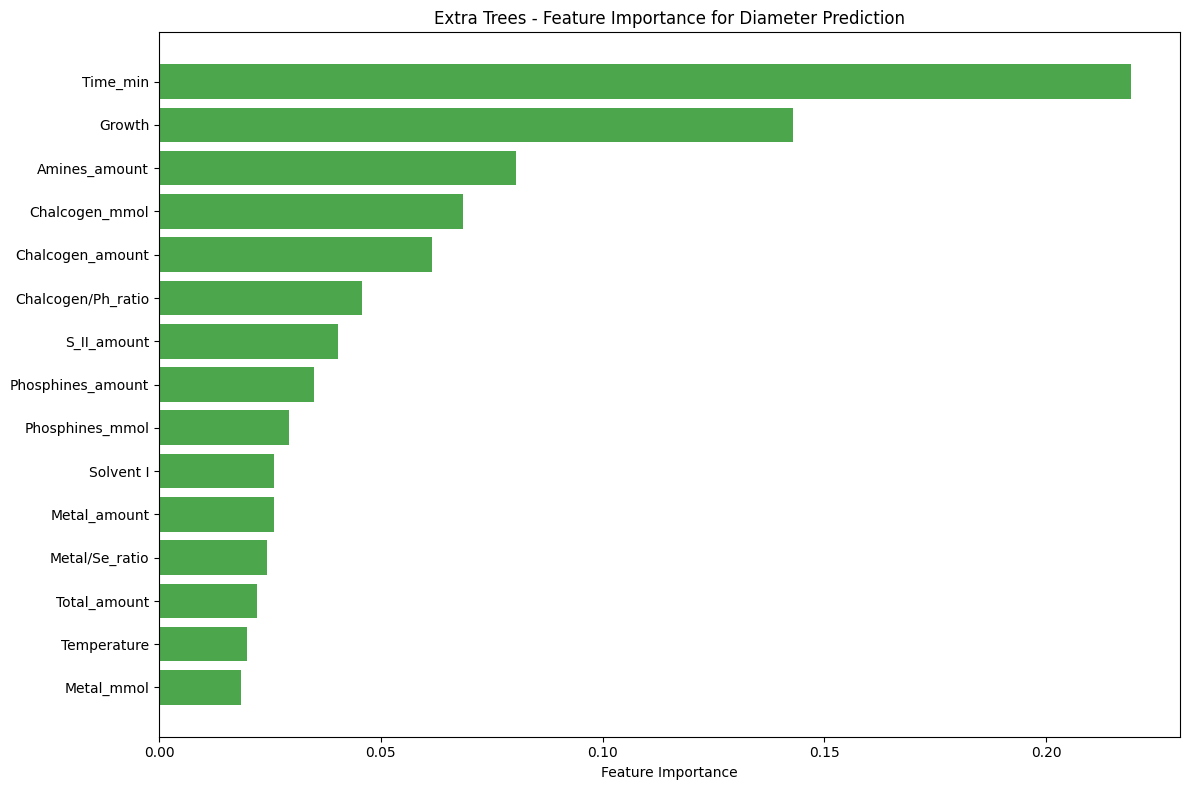

In [90]:
# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='green', alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Extra Trees - Feature Importance for Diameter Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

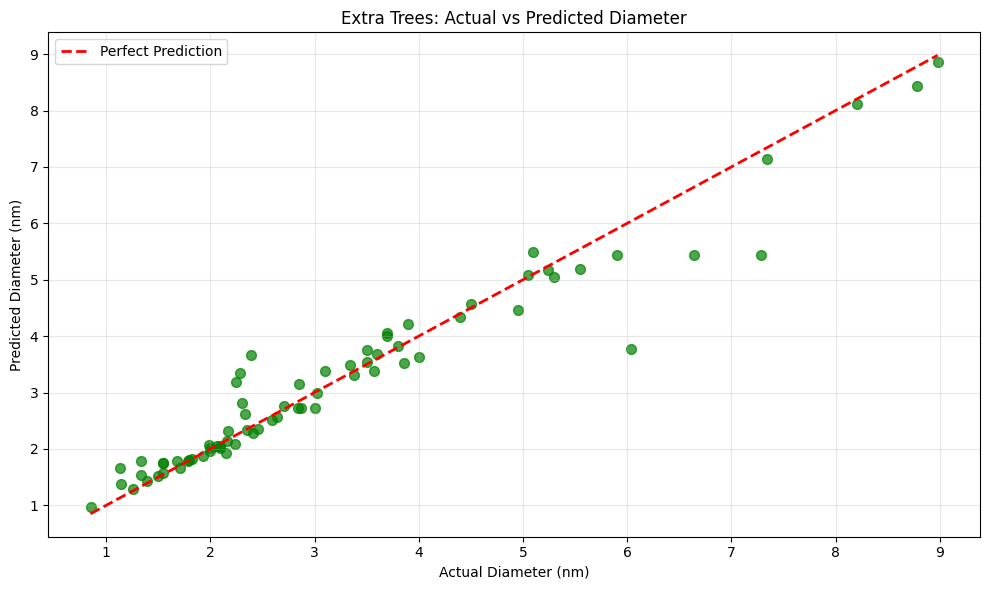

In [91]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_le_test, y_pred, alpha=0.7, s=50, color='green')
plt.plot([y_le_test.min(), y_le_test.max()], [y_le_test.min(), y_le_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Diameter (nm)')
plt.ylabel('Predicted Diameter (nm)')
plt.title('Extra Trees: Actual vs Predicted Diameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

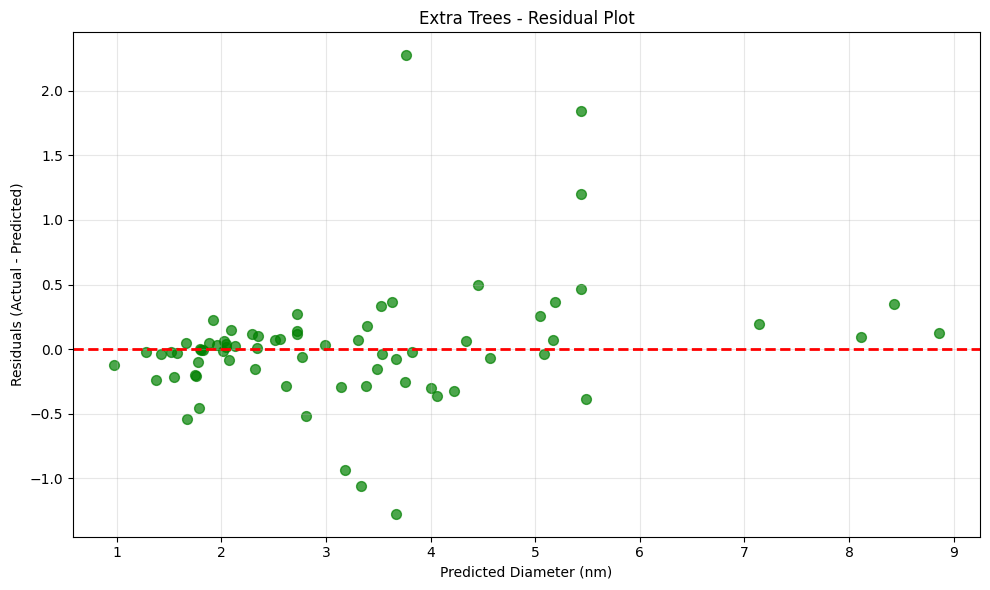

In [92]:
# Residual plot
residuals = y_le_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, s=50, color='green')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Diameter (nm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Extra Trees - Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [94]:
# Create and train Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Step size shrinkage
    max_depth=3,           # Maximum depth of individual trees
    min_samples_split=2,   # Minimum samples required to split a node
    min_samples_leaf=1,    # Minimum samples required at a leaf node
    subsample=0.8,         # Fraction of samples used for fitting
    random_state=42
)

gbm_regressor.fit(X_le_train, y_le_train)

GradientBoostingRegressor(random_state=42, subsample=0.8)

In [95]:
# Make predictions
y_pred = gbm_regressor.predict(X_le_test)

In [96]:
# Evaluate the model
mse = mean_squared_error(y_le_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_le_test, y_pred)

print(f"\n=== GBM Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f} nm")
print(f"Mean Squared Error: {mse:.4f}")


=== GBM Model Performance ===
R² Score: 0.8839
Root Mean Squared Error: 0.6368 nm
Mean Squared Error: 0.4055


In [97]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_le.columns.to_list(),
    'importance': gbm_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Top 10 Most Important Features ===")
print(feature_importance.head(10))


=== Top 10 Most Important Features ===
                    feature  importance
1                    Growth    0.306086
26                 Time_min    0.188883
20       Chalcogen/Ph_ratio    0.080743
7          Chalcogen_amount    0.052463
11          Carboxylic_Acid    0.038467
24              S_II_amount    0.038169
8            Chalcogen_mmol    0.034381
18        Phosphines_amount    0.029743
4                Metal_mmol    0.029416
9   Chalcogen_concentration    0.029319


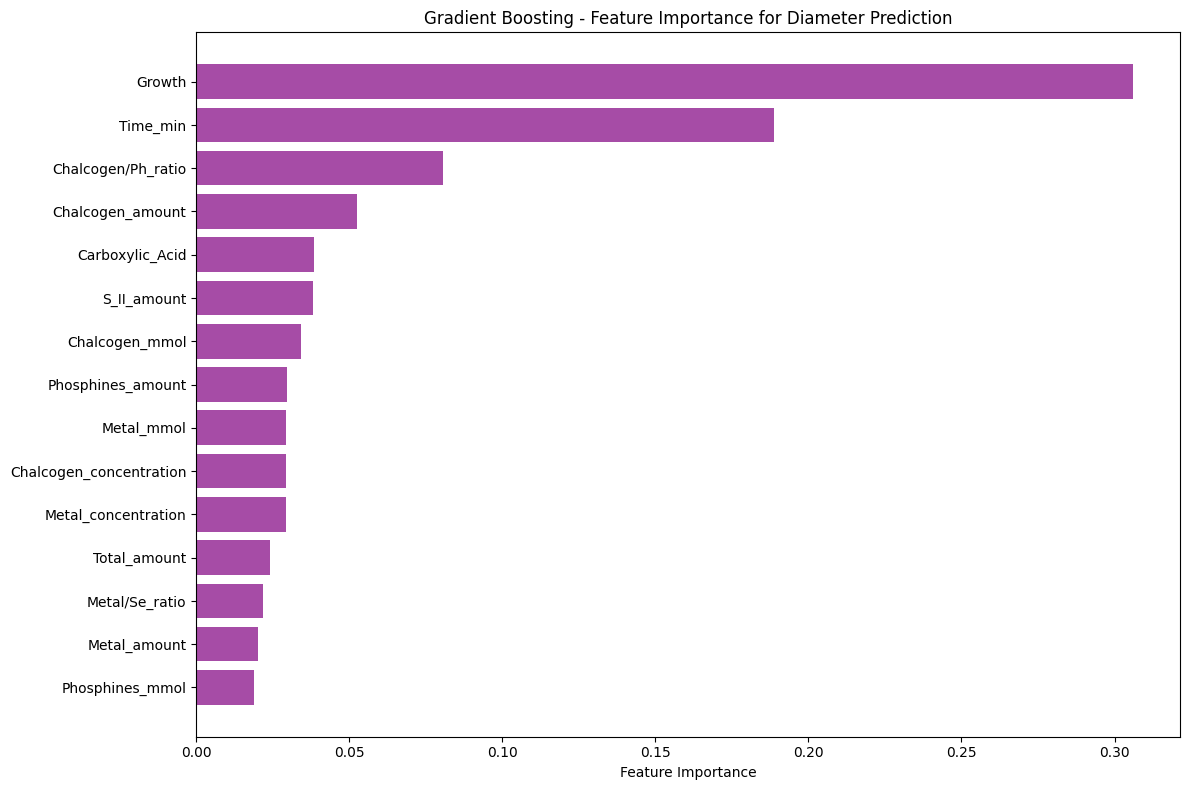

In [98]:
# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='purple', alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting - Feature Importance for Diameter Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

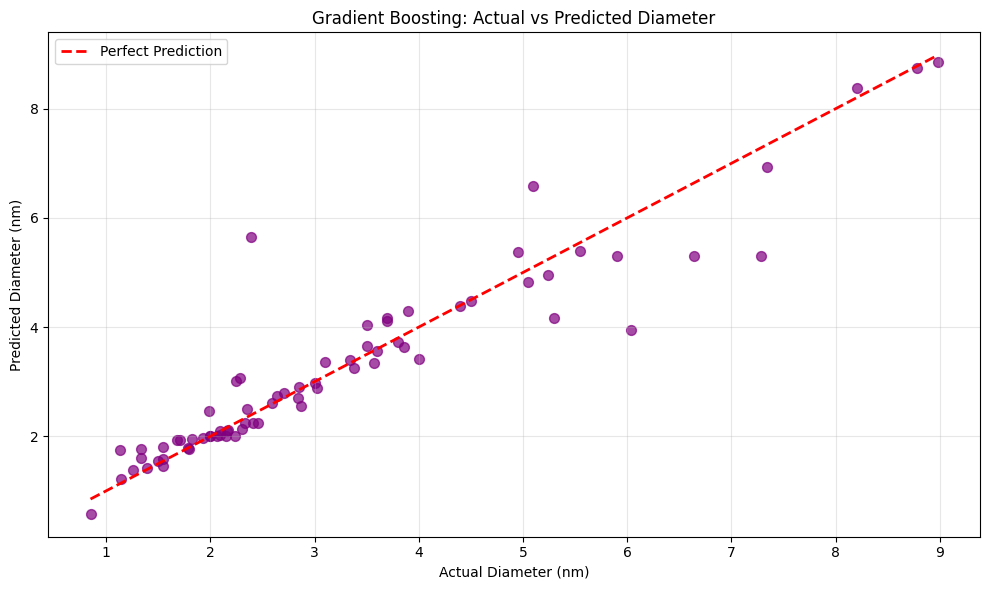

In [100]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_le_test, y_pred, alpha=0.7, s=50, color='purple')
plt.plot([y_le_test.min(), y_le_test.max()], [y_le_test.min(), y_le_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Diameter (nm)')
plt.ylabel('Predicted Diameter (nm)')
plt.title('Gradient Boosting: Actual vs Predicted Diameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

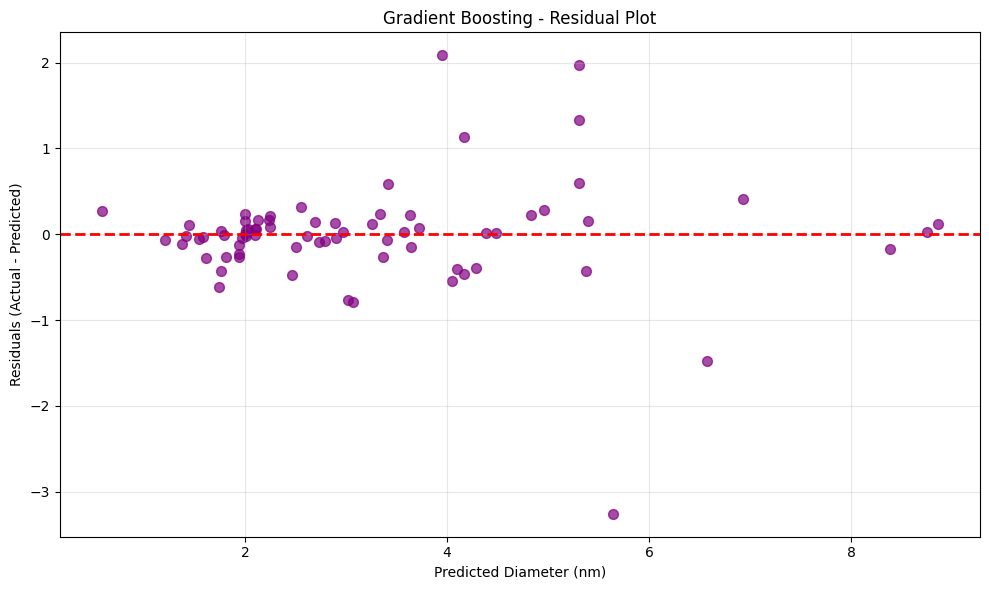

In [102]:
# Residual plot
residuals = y_le_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, s=50, color='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Diameter (nm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Gradient Boosting - Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [104]:
# Create and train XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(
    n_estimators=1000,        # Number of boosting rounds
    learning_rate=0.1,        # Step size shrinkage
    max_depth=6,              # Maximum tree depth
    min_child_weight=1,       # Minimum sum of instance weight needed in a child
    subsample=0.8,           # Subsample ratio of training instances
    colsample_bytree=0.8,    # Subsample ratio of columns
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=1.0,          # L2 regularization
    random_state=42,
    n_jobs=-1,               # Use all available cores
    early_stopping_rounds=50, # Early stopping
    eval_metric='rmse'        # Evaluation metric
)

# Fit with validation set for early stopping
xgb_regressor.fit(
    X_le_test, y_le_test,
    eval_set=[(X_le_test, y_le_test)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [105]:
# Make predictions
y_pred = xgb_regressor.predict(X_le_test)

In [106]:
# Evaluate the model
mse = mean_squared_error(y_le_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_le_test, y_pred)

print(f"\n=== XGBoost Model Performance ===")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f} nm")
print(f"Mean Squared Error: {mse:.4f}")


=== XGBoost Model Performance ===
R² Score: 0.9999
Root Mean Squared Error: 0.0192 nm
Mean Squared Error: 0.0004


In [107]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_le.columns.to_list(),
    'importance': xgb_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Top 10 Most Important Features ===")
print(feature_importance.head(10))



=== Top 10 Most Important Features ===
                feature  importance
1                Growth    0.381588
5   Metal_concentration    0.076250
7      Chalcogen_amount    0.068029
3          Metal_amount    0.053520
4            Metal_mmol    0.049542
16        Amines_amount    0.043030
13              CA_mmol    0.039509
12            CA_amount    0.036762
20   Chalcogen/Ph_ratio    0.034956
2          Metal_source    0.033672


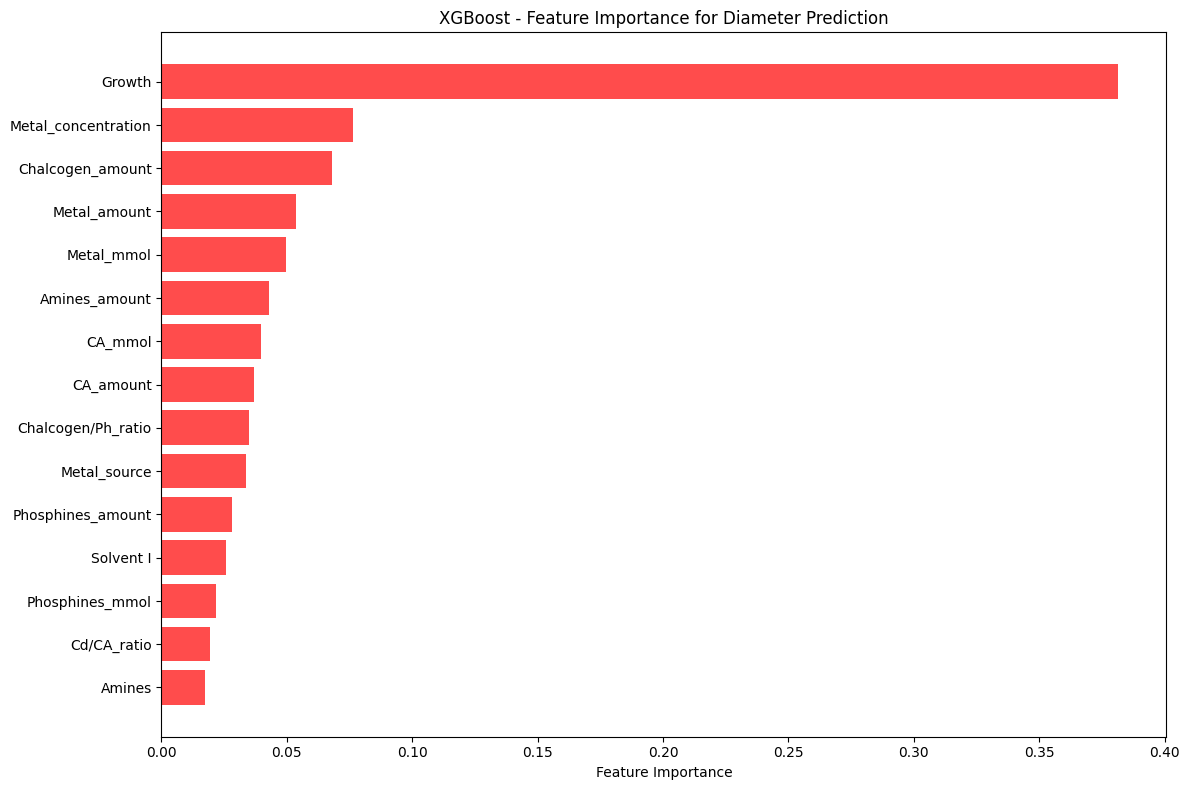

In [108]:
# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='red', alpha=0.7)
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance for Diameter Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

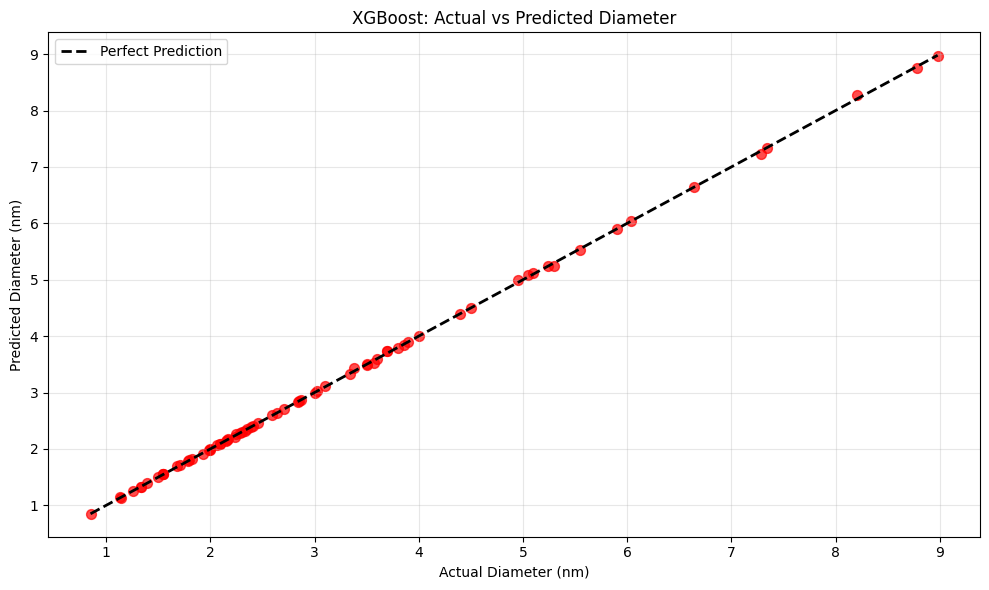

In [109]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_le_test, y_pred, alpha=0.7, s=50, color='red')
plt.plot([y_le_test.min(), y_le_test.max()], [y_le_test.min(), y_le_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Diameter (nm)')
plt.ylabel('Predicted Diameter (nm)')
plt.title('XGBoost: Actual vs Predicted Diameter')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

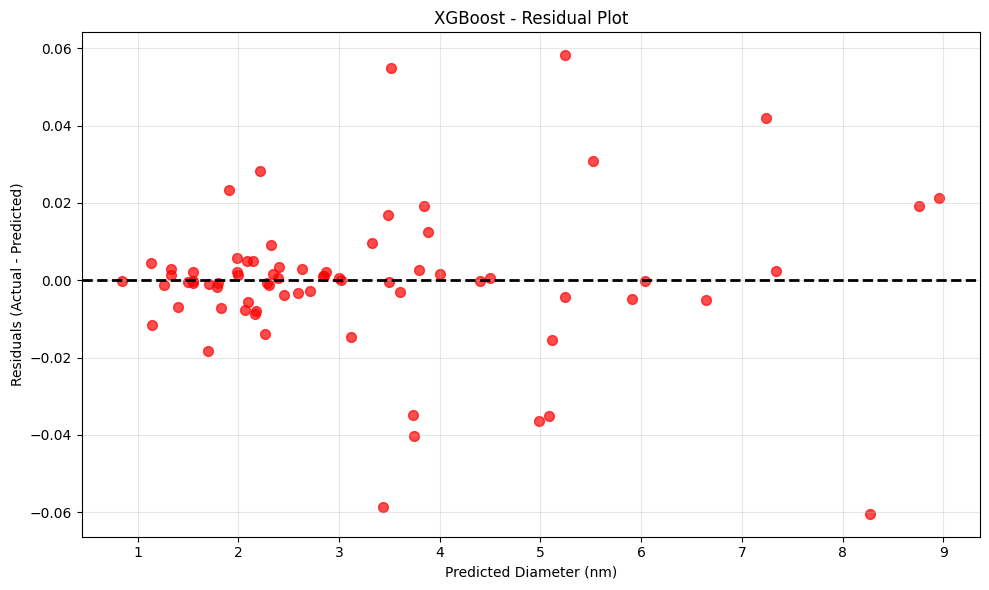

In [111]:
# Residual plot
residuals = y_le_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, s=50, color='red')
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Diameter (nm)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('XGBoost - Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

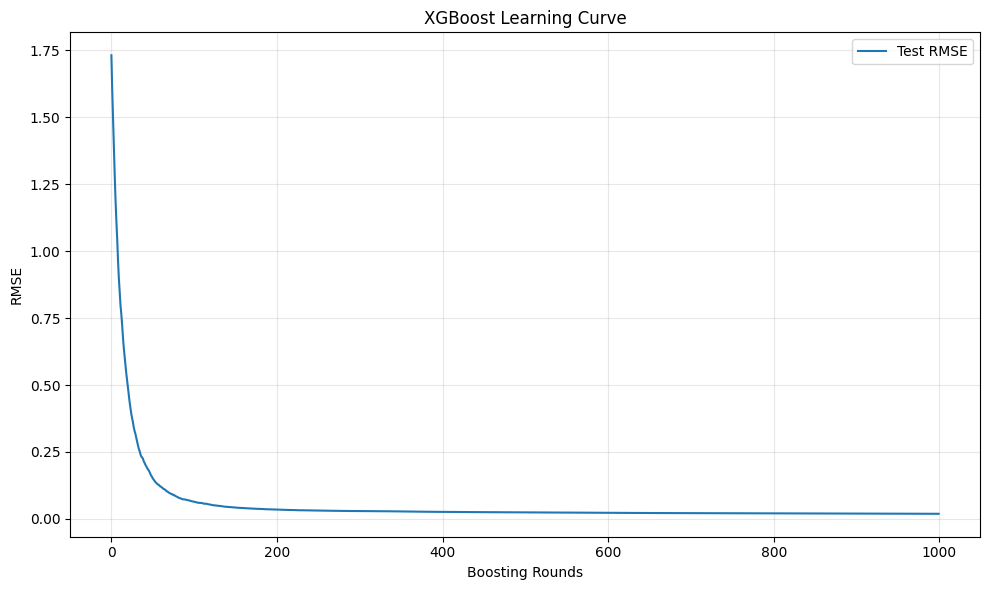

In [112]:
# Plot training history
results = xgb_regressor.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Test RMSE')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()